# IMDB MOVIE ANALYSIS

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#load">Loading and Exploring the Dataset</a></li>    
<li><a href="#wrang">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
    <li> <a href="#r1">Research Question 1</a></li>
    <li> <a href="#r2">Research Question 2</a></li>
    <li> <a href="#r3">Research Question 3</a></li>
    </ul>
<li><a href="#conclusions">Conclusion and Limitations</a></li>
<li><a href="#reference">References</a></li>
    
</ul>

<a id='intro'></a>
## Introduction

The International Movies Database (IMDB) contains a collection of movies and television shows as well as the directors, cast, revenue, budget and vote rating, etc. of these movies. It provides users the  opportunity to decide which movie they should go for. This report analyses the IMDB Dataset from 1960 to 2015 and it should be taken into account that the conclusions made in this report are in that time frame and solely for the movies provided in this database.

For this report, the dependent variables analyzed are casts and genres of the movies.

+ **Cast**: The choice of users is greatly influenced by the casts in a movie. Fans of a particular movie cast prefer movies by the cast to other movies. Users may also rate the quality of a movie by the casts it features.


+ **Genre**: Most users have a particular taste in Genre. Some may prefer a genre to another and some genres are also more widely accepted than others.

The key independent variables used for the analysis are:

+ **Revenue**: The amount of revenue generated might be a relection of the quality of a movie/tv show. Good shows tend to generate higher revenue. Similarly, many individuals prefer the highest grossing movies because of the assumed quality it is expected to have. 


+ **Voting Average**: This is the standard rating system adopted by IMDB. The rating is from 1 (lowest) to 10 (highest). It usually serves as a measure of how much a movie is preferred by the populace and this metric is adopted by many users to select their movie of preference.


+ **Budget**: The Budget is the total amount on a movie/tv show from inception to production. Sometimes, high-budgeted movies may be perceived as quality because more money is spent on the movie to make it top-notch. 

Based on the dependent and independent variables mentioned above, the following are the research questions analyzed in this report.

+ Who are the most featured casts and what are the characteristics attributed to them?
+ Who are the casts of the highest grossing movies and what is the general overview of their footprint in the movie industry?
+ Does genre popularity influence rating?

In [1]:
# Importing the required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<a id='load'></a>

## Loading and Exploring the Dataset

In [2]:
#Loading the dataset
df = pd.read_csv("tmdb-movies.csv")

#Exploring the dataset
display(df.head(2))
display(df.info())

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

None

In [3]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df = df.drop_duplicates()

<a id='wrang'></a>

## Data Wrangling

In [6]:
def dependent_variable(x):
    df1 = df[df[x].notna()]
    df_v1 = df1[x].str.split("|",expand = True)
    df_v1.columns = ['split1','split2','split3','split4','split5']
    for c in df_v1.columns:
        df1[c] = df_v1[c]
    
    name = "corrected_" + x
    v1 = df1.drop(['split2', 'split3','split4','split5'],1)
    v1[name] = v1['split1']

    v2 = df1[df1['split2'].notna()]
    v2 = v2.drop(['split1', 'split3','split4','split5'],1)
    v2[name] = v2['split2']

    v3 = df1[df1['split3'].notna()]
    v3 = v3.drop(['split1', 'split2','split4','split5'],1)
    v3[name] = v3['split3']

    v4 = df1[df1['split4'].notna()]
    v4 = v4.drop(['split1', 'split2','split3','split5'],1)
    v4[name] = v4['split4']

    v5 = df1[df1['split5'].notna()]
    v5 = v5.drop(['split1', 'split2','split3','split4'],1)
    v5[name] = v5['split5'] 
    
    first_merge_cast = v1.merge(v2,how="outer")
    second_merge_cast = first_merge_cast.merge(v3, how="outer")
    third_merge_cast = second_merge_cast.merge(v4, how="outer")
    df1 = third_merge_cast.merge(v5,how="outer")

    df1 = df1.drop(['split1', 'split2','split3','split4','split5','cast'],1)
    return df1

In [7]:
cast_df = dependent_variable('cast')
genres_df = dependent_variable("genres")

<a id='eda'></a>

## Exploratory Data Analysis

In [8]:
top_5_grossing = df[df['revenue'] >= 1513528810].sort_values(by="revenue",ascending=False)['original_title']
top_5_grossing.values

array(['Avatar', 'Star Wars: The Force Awakens', 'Titanic',
       'The Avengers', 'Jurassic World'], dtype=object)

In [9]:
df['vote_average'].nlargest(10)
highest_votes = df[df['vote_average']>=8.5]
highest_votes[['original_title','vote_average','release_year']].sort_values(by= 'vote_average',ascending=False)

,original_title,vote_average,release_year
3894,The Story of Film: An Odyssey,9.2,2011
538,The Mask You Live In,8.9,2015
1200,Black Mirror: White Christmas,8.8,2014
2269,Life Cycles,8.8,2010
6911,Pink Floyd: Pulse,8.7,2006
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6,2010
3224,John Mayer: Where the Light Is Live in Los Ang...,8.5,2008
3690,The Art of Flight,8.5,2011
5830,Doctor Who: The Time of the Doctor,8.5,2013
8221,A Personal Journey with Martin Scorsese Throug...,8.5,1995


<a id='r1'></a>

#### Research Question 1: Who are the featured popular casts and what are the characteristics attributed to them?

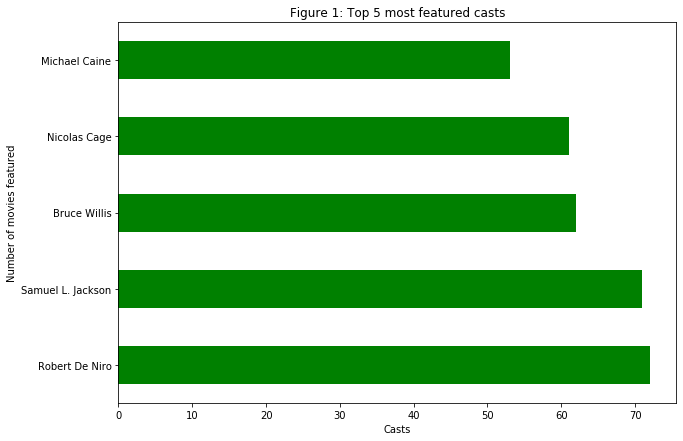

In [10]:
five_most_popular = cast_df['corrected_cast'].value_counts()[0:5]
fig = plt.figure(figsize =(10, 7))
five_most_popular.plot.barh(color='green')
plt.title("Figure 1: Top 5 most featured casts")
plt.xlabel("Casts")
plt.ylabel("Number of movies featured")
plt.show()

In [11]:
for c in five_most_popular.index:
    avg_rating = cast_df[cast_df["corrected_cast"] == c]["revenue"].mean()
    print (c,round(avg_rating))

Robert De Niro 71200080
Samuel L. Jackson 99406032
Bruce Willis 105905564
Nicolas Cage 79776868
Michael Caine 101075212


In [12]:
for c in five_most_popular.index:
    avg_rating = cast_df[cast_df["corrected_cast"] == c]["vote_average"].mean()
    print (c, avg_rating)

Robert De Niro 6.330555555555556
Samuel L. Jackson 6.090140845070424
Bruce Willis 5.903225806451614
Nicolas Cage 5.77704918032787
Michael Caine 6.350943396226415


In [13]:
top_5_grossing = df[df['revenue'] >= 1513528810].sort_values(by="revenue",ascending=False)['original_title']

In [14]:
df['revenue'].nlargest(10)
highest_revenue = cast_df[cast_df['revenue']>=1215439994]
highest_revenue = highest_revenue[['original_title','corrected_cast','revenue']].sort_values(by= 'revenue',ascending=False)

In [15]:
cast_highest_revenue = highest_revenue['original_title'].values
x = 0

for c in five_most_popular:
    d = cast_df[cast_df['corrected_cast']==c]['original_title']
    for i in d:
        if i in cast_highest_revenue:
            x=x+1   
print (x)

0


**Figure 1** below gives a general breakdown of the top 5 most featured casts in the movies/tv shows from IMDB. The following are a breakdown of the most featured casts and general characteristics of these casts in the movie industry

+ **Robert De Niro**: He is the most featured cast in the IMDB dataset. He featured as a cast in 72 movies. He has been a cast in movies since 1973 which was when the first movie he featured in was released. These movies had an average revenue of 71200080 which is the lowest in the list of the top 5 most featured casts. The overall vote average of the movies he featured is 6.33.


+ **Samuel L. Jackson**: He is the second on the list and he featured in 71 movies. Of the five, he's career in the industry started later than the rest. He started featuring in movies in 1992. The average revenue in the movies he featured in is approximately 99 million dollars and the overall vote average of the movies he featured is 6.09 which is lower than that of Robert De Niro.


+ **Bruce Williams**: As the third in the least of most featured, he started his career in 1987. He was a cast in the highest grossing movies with an average generated revenue of about 106 hundred million dollars. However, the overall vote average of the movies he featured was 5.9.


+ **Nicolas Cage**: He is the second to last on the least with a record of 61 features in movies. His movie career started in 1983. His movies had a general vote average of 5.8 which is the lowest in this category.


+ **Michael Caine** : He is the fifth most featured cast with a record of 53 features in movies. Of the five, his career in the movie industry started earliest. He also featured in the movies with the best vote average in this category with an overall vote average of 6.35.

Generally, all the casts in the list of the five most featured casts started their career before the 2000s but still featured in recent movies, as recent as 2015. However, they did not feature in any of the top 10 highest grossing movies and they had a vote average of approximately 6.0

<a id='r2'></a>

#### Research Question 2: Who are the casts of the highest grossing movies and what is the general overview of their footprint in the movie industry?

In [16]:
df[df['original_title'] == 'Avatar']['vote_average']

1386    7.1
Name: vote_average, dtype: float64

In [17]:
df[df['original_title'] == 'Avatar']['revenue']

1386    2781505847
Name: revenue, dtype: int64

In [18]:
#The highest grossing movie is Avatar
avatar_cast = cast_df[cast_df['original_title'] == 'Avatar']['corrected_cast']
avatar_cast

1365        Sam Worthington
12126           Zoe Saldana
22747      Sigourney Weaver
33273          Stephen Lang
43663    Michelle Rodriguez
Name: corrected_cast, dtype: object

In [19]:
cast_highest_votes = highest_votes['original_title'].values
x = 0

for c in avatar_cast:
    d = cast_df[cast_df['corrected_cast']==c]['original_title']
    for i in d:
        if i in cast_highest_votes:
            x=x+1
            
print (x)

0


In [20]:
labels = []
revenue_avg = []
budget_avg = []

for c in avatar_cast:
    labels.append(c)
    revenue_avg.append(cast_df[cast_df['corrected_cast']==c]['revenue'].mean())
    budget_avg.append(cast_df[cast_df['corrected_cast']==c]['budget'].mean())

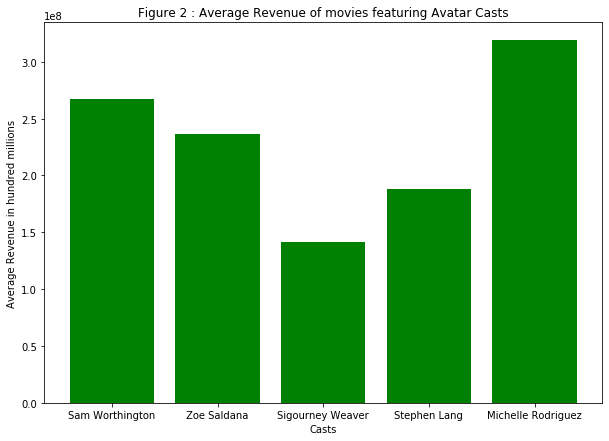

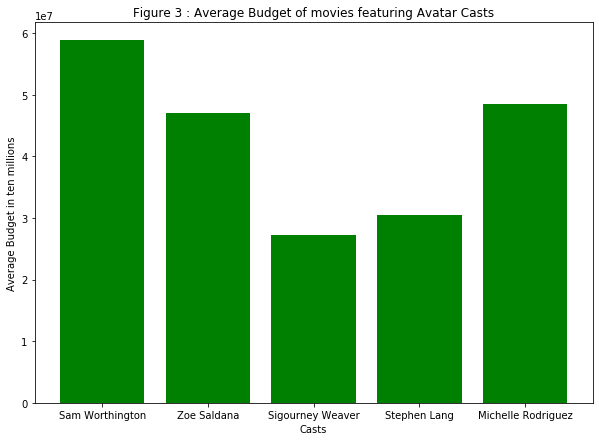

In [21]:
def plot(labels,values,caption, fig_number,quantity):
    fig = plt.figure(figsize = (10,7))
    plt.bar(labels, values, color='green')
    plt.xlabel("Casts")
    plt.ylabel("Average {} in {}".format(caption, quantity))
    plt.title("Figure {} : Average {} of movies featuring Avatar Casts".format(fig_number, caption));
    plt.show()

plot(labels, revenue_avg,"Revenue",2, 'hundred millions')
plot(labels, budget_avg, "Budget",3, 'ten millions')

In [22]:
for c in avatar_cast:
    n = cast_df[cast_df['corrected_cast']==c]['original_title'].nunique()
    v = cast_df[cast_df['corrected_cast']==c]['vote_average'].mean()
    w = cast_df[cast_df['corrected_cast']==c]['release_year'].min()
    print (c, ": Number of movies - "+str(n), " Overall vote average - " +str(round(v,2)) )

Sam Worthington : Number of movies - 15  Overall vote average - 5.93
Zoe Saldana : Number of movies - 19  Overall vote average - 6.27
Sigourney Weaver : Number of movies - 33  Overall vote average - 6.32
Stephen Lang : Number of movies - 16  Overall vote average - 5.57
Michelle Rodriguez : Number of movies - 17  Overall vote average - 5.79


              vote_average   revenue
vote_average      1.000000  0.172541
revenue           0.172541  1.000000


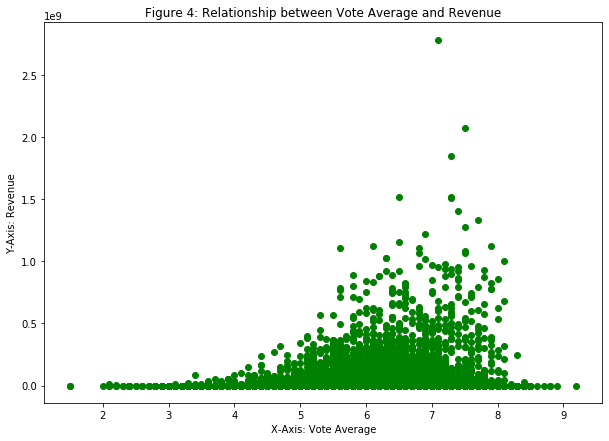

In [23]:
print (df[['vote_average','revenue']].corr())

fig = plt.figure(figsize = (10,7))
plt.scatter(df['vote_average'], df['revenue'], color='green')
plt.xlabel("X-Axis: Vote Average")
plt.ylabel("Y-Axis: Revenue")
plt.title("Figure 4: Relationship between Vote Average and Revenue")
plt.show()
#There is a slight positive correlation

The 5 popular casts for the movie - **Avatar (2009)** , were: 
- Sam Worthington
- Zoe Saldana
- Sigourney Weaver
- Stephen Lang 
- Michelle Rodriguez. 

Avatar was not their first movie as they already had footprints in the movie industry. Apart from Avatar, Sigourney Weaver featured in 32 other movies. He had the highest featuring in this category followed by Zoe Saldana who featured in 18 other movies. 

While the vote average for Avatar was 7.1/10, these casts had an overall vote average less than 7.1 which shows that they featured in movies with a lower vote average. Sigourney Weaver had the highest vote average of 6.32 while Stephen Lang who has featured in 15 other movies excluding the Avatar featured in movies with an overall vote average of 5.57. 

While the movies Sigourney featured in had higher ratings than the rest in this group, they also had the lowest average revenue. In a bid to ascertain whether there was a significant relationship between ratings and revenue of a movie, a scatter plot (**Figure 4**) was plotted which showed a weak positive correlation of 0.17 between revenue and vote average. In addition, further analysis also showed that none of this actors featured in the top 10 movies with the highest vote averages. The highest vote average in the IMDB dataset was for the movie **"The Story of Film: An Odyssey"** which had a vote average of 9.2 


From **Figure 2** above, it can be inferred that the in this category, Michelle Rodriguez featured in movies with higher revenue than the rest of the group with an average revenue of over 300 million dollars, followed by Sam Worthington. The lowest on the list was Sigourney Weaver with only 150 million dollars. However, in **Figure 3** below, it can be inferred that Sam Worthington featured in movies with a higher budget than Michelle Rodriguez which shows that movies with the highest budget may not necessarily generate the highest revenue. As before, Sigourney Weaver also featured in movies with the lowest budget in this category. 


<a id='r3'></a>
#### Research Question 3:  Does genre popularity influence rating?

In [24]:
genres_list = genres_df['corrected_genres'].value_counts() 
#A movie can have more than one genre

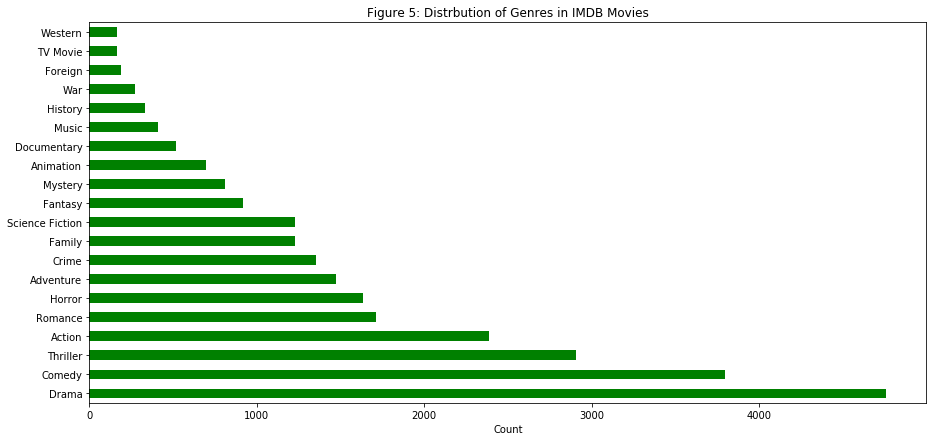

In [25]:
fig = plt.figure(figsize =(15, 7))
genres_list.plot.barh(color='green')
plt.title("Figure 5: Distrbution of Genres in IMDB Movies")
plt.xlabel("Count")
plt.show()

6.6


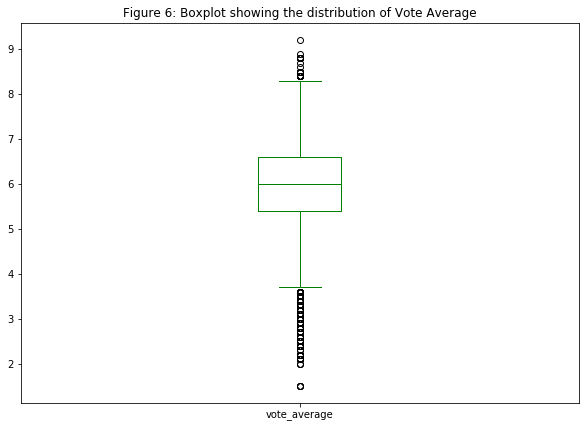

In [26]:
#The best ratings in the 75% percentile
print (genres_df['vote_average'].describe()['75%'])

fig = plt.figure(figsize = (10,7))
genres_df['vote_average'].plot(kind='box', color='green')
plt.title("Figure 6: Boxplot showing the distribution of Vote Average")
plt.show()

In [27]:
genres = []
vote_average = []
for c in genres_list.index:
    genres.append(c)
    w = genres_df[genres_df['corrected_genres'] == c]['vote_average'].mean()
    vote_average.append(round(w,2))

new_df = pd.DataFrame(vote_average,genres,columns=['Vote Average'])
new_df = new_df.sort_values(by = 'Vote Average', ascending=False)
new_df.head(10)

,Vote Average
Documentary,6.91
Music,6.48
History,6.41
Animation,6.40
War,6.30
Drama,6.17
Crime,6.12
Western,6.08
Romance,6.04
Family,6.00


In [28]:
best_voted = genres_df[genres_df['vote_average'] >= 6.6]
best_voted['corrected_genres'].value_counts().head()

Drama       1575
Comedy       831
Thriller     512
Action       479
Romance      434
Name: corrected_genres, dtype: int64

Based on **Figure 5** above, the top 5 featured genres in movie industry are the Drama, Comedy, Thriller, Action and Romance genres (in that order). From the box plot in **Figure 6** the 75th percentile rating is 6.6. It was also observed that the top 5 most featured genre in the 75th percentile were also Drama, Comedy, Thriller, Action and Romance. However, upon compuation of the average rating of all genres, only the Drama and Romance genre made the list of the top 10 average rated genres in the 6th and 9th position respectively. At the top of the list were Documentary, Music and History with an average rating of 6.91, 6.48 and 6.41. These genres featured in 520, 408 and 334 movies and 366, 191 and 434 in the 75th percentile of rated movies. The result from the analysis shows that the most popular movie genres may not be the most widely accepted or rated. 

<a id='conclusions'></a>

## Conclusions and Limitations

This report analyzed the International Movies dataset containing movies from 1960 to 2015. Based on the analysis generated in this report, Avatar(2009) was observed to be the highest grossing movie with a revenue of 2.7 billion dollars. It also had a movie rating of 7.1 which is above the average rating of movies in the database. The casts of this movie were also present in other movies before and after Avatar. Sigourney Weaver had the highest feature in movies although the movies he featured in had the lowest revenue and budget compared to the other casts in Avatar. 

Robert De Niro is the most featured cast featuring in 72 movies as early as 1973. His close competitor was Samuel L. Jackson who featured in 71 movies from 1992 to 2015. However, none of the top 5 most featured casts were casts in the highest grossing movies. 

This report also established that certain genres were more favourable to users than the others. Although not the most featured genre in the movie industry, the Documentary, Music and History genres had a higher average rating than the other genres.

One major limitation of this report is that the movies provided in the database are not up to date and so the analysis performed are limited to movies from 1960 to 2015. In addition, the data had some discrepancies which could add bias to/influence the analysis reported. Some of which are: 

+ The movie Tekken (2010) directed by Dwight Little was recorded twice
+ The casts of some movies were missing
+ The genres of some movies were missing

<a id='reference'></a>

## References

+ [Ignoring Python Warnings](https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings)
+ [Markdown Guide](https://www.markdownguide.org/basic-syntax/)
+ [IMDB Help Center](https://help.imdb.com/article/imdb/track-movies-tv/the-vote-average-for-film-x-should-be-y-why-are-you-displaying-another-rating/G3RC8ZNFAGWNTX4L?ref_=helpart_nav_9#)
+ [String Split in Pandas](https://blog.hubspot.com/website/pandas-split-string)
+ [Matplotlib Figure Function](https://www.geeksforgeeks.org/matplotlib-pyplot-figure-in-python/)
+ [Pandas Cheet Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
+ [Choosing Plot Types](https://udacity-reviews-uploads.s3.us-west-2.amazonaws.com/_attachments/83662/1588660779/How-to-Visualize-your-Data-with-Charts-and-Graphs.jpg)
+ [Avioding Code Repetition with Functions](https://hub.packtpub.com/python-functions-avoid-repeating-code/)